In [23]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [24]:
# 2. Đọc file dữ liệu và chia train test validate theo tỉ lệ 6:3:1
df = pd.read_csv('/content/HSG Historical Data.csv', sep=";")
df=df['Price']

df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.9 * len(df))
test_size = int(0.1 * len(df))

train_data = df[:train_size]
test_data = df[train_size:]

In [25]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [26]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)

In [27]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[10.32838729 10.31741704 10.30644679 10.29547655 10.2845063  10.27353605
 10.2625658  10.25159555 10.2406253  10.22965505 10.2186848  10.20771455
 10.19674431 10.18577406 10.17480381 10.16383356 10.15286331 10.14189306
 10.13092281 10.11995256 10.10898231 10.09801207 10.08704182 10.07607157
 10.06510132 10.05413107 10.04316082 10.03219057 10.02122032 10.01025007]


In [28]:
# 7. Đánh giá độ chính xác thuật toán
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print('Testing MAE:', test_mae)

Testing RMSE: 5.461915016781741
Testing MAPE: 97.73574620980106
Testing MAE: 5.403926666971368


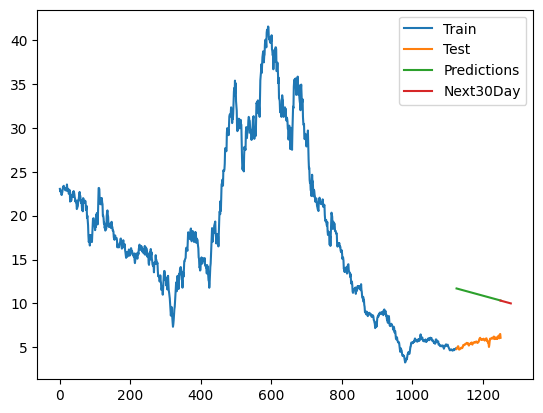

In [29]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [30]:
# 9. Quá trình tạo index predict 60 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(x_next_60_days)

# Print the predicted closing prices for the next 60 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

Predicted closing prices for the next 60 days:
[10.32838729 10.31741704 10.30644679 10.29547655 10.2845063  10.27353605
 10.2625658  10.25159555 10.2406253  10.22965505 10.2186848  10.20771455
 10.19674431 10.18577406 10.17480381 10.16383356 10.15286331 10.14189306
 10.13092281 10.11995256 10.10898231 10.09801207 10.08704182 10.07607157
 10.06510132 10.05413107 10.04316082 10.03219057 10.02122032 10.01025007
  9.99927983  9.98830958  9.97733933  9.96636908  9.95539883  9.94442858
  9.93345833  9.92248808  9.91151783  9.90054759  9.88957734  9.87860709
  9.86763684  9.85666659  9.84569634  9.83472609  9.82375584  9.8127856
  9.80181535  9.7908451   9.77987485  9.7689046   9.75793435  9.7469641
  9.73599385  9.7250236   9.71405336  9.70308311  9.69211286  9.68114261]


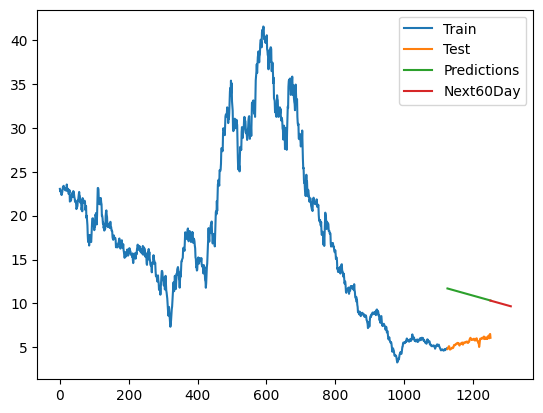

In [31]:
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_60_days)
plt.legend(['Train', 'Test', 'Predictions','Next60Day'])
plt.show()

In [32]:
# 10. Quá trình tạo index predict 90 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = model.predict(x_next_90_days)

# Print the predicted closing prices for the next 90 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
[10.32838729 10.31741704 10.30644679 10.29547655 10.2845063  10.27353605
 10.2625658  10.25159555 10.2406253  10.22965505 10.2186848  10.20771455
 10.19674431 10.18577406 10.17480381 10.16383356 10.15286331 10.14189306
 10.13092281 10.11995256 10.10898231 10.09801207 10.08704182 10.07607157
 10.06510132 10.05413107 10.04316082 10.03219057 10.02122032 10.01025007
  9.99927983  9.98830958  9.97733933  9.96636908  9.95539883  9.94442858
  9.93345833  9.92248808  9.91151783  9.90054759  9.88957734  9.87860709
  9.86763684  9.85666659  9.84569634  9.83472609  9.82375584  9.8127856
  9.80181535  9.7908451   9.77987485  9.7689046   9.75793435  9.7469641
  9.73599385  9.7250236   9.71405336  9.70308311  9.69211286  9.68114261
  9.67017236  9.65920211  9.64823186  9.63726161  9.62629136  9.61532112
  9.60435087  9.59338062  9.58241037  9.57144012  9.56046987  9.54949962
  9.53852937  9.52755912  9.51658888  9.50561863  9.49464838  9.48367813
  9.47

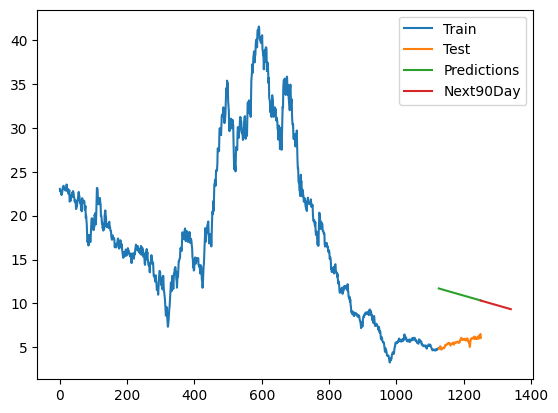

In [33]:
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_90_days)
plt.legend(['Train', 'Test', 'Predictions','Next90Day'])
plt.show()